In [1]:
import re
import os 
import datetime
from math import log
import csv
import pprint
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from pandas.io.parsers import read_csv
pd.set_option('max_colwidth',120)
from elasticsearch import Elasticsearch, helpers
from elasticsearch.helpers import scan
from __future__ import division

%matplotlib inline

pp = pprint.PrettyPrinter()

In [2]:
#bashcommand='pwd'

In [3]:
es = Elasticsearch([{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=10)

In [4]:
indices = es.cat.indices(index=['jobs_archive_2016-09-01','jobs_archive_2016-09-02','jobs_archive_2016-09-03'], h="index", request_timeout=10).split('\n')
indices = sorted(indices)
indices = [x.replace(" ", "") for x in indices if x != '']

In [5]:
print (indices)

['jobs_archive_2016-09-01', 'jobs_archive_2016-09-02', 'jobs_archive_2016-09-03']


In [48]:
ss={
 "query": { "prefix": { "cloud": "FR" } 
}, "_source": ["pandaid","batchid","computingsite","computingelement","corecount","creationtime","starttime","endtime",
   "cpuconsumptiontime","wall_time","modificationhost","maxrss","maxpss","cloud"]
#    ,"size": 5
    }



#ss= {"query": { "match_all": {} },"size": 10000} 
print (ss)



{'query': {'prefix': {'cloud': 'FR'}}, '_source': ['pandaid', 'batchid', 'computingsite', 'computingelement', 'corecount', 'creationtime', 'starttime', 'endtime', 'cpuconsumptiontime', 'wall_time', 'modificationhost', 'maxrss', 'maxpss', 'cloud']}


In [7]:
#res = es.search(index='jobs_archive_2016-06-26', body=ss, filter_path=['hits.hits._source'],request_timeout=12000)

In [ ]:
res=es.search(index=indices, body=ss,request_timeout=12000)
#print (res)
len(res)
#print (res)

In [9]:
 #res.get('hits').get('hits')

In [56]:
scroll=scan(es,index=indices, query=ss,scroll=u'30m', raise_on_error=True, preserve_order=False, size=200000,request_timeout=300)

In [57]:
c=1
list2=[]
for name in scroll:
 a=name.get('_source')
 list2.append(a)
 c=c+1
print (c)
type(list2)
dfu = pd.DataFrame(list2)
 
#dfu.batchid.count()
dfu.head()
 
 

278880


,batchid,cloud,computingelement,computingsite,corecount,cpuconsumptiontime,creationtime,endtime,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
0,14743154,FR,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,95,2016-08-31T23:32:47,2016-08-31T23:53:14,820102.0,833168.0,ccwsge0100,2974962901,2016-08-31T23:50:04,190
1,2103056.lcg-ce02.icepp.jp,FR,ANALY_TOKYO,ANALY_TOKYO,1.0,10158,2016-08-31T14:32:19,2016-08-31T23:53:26,2635311.0,2702544.0,lcg-wn05-10.icepp.jp,2974358569,2016-08-31T20:44:04,11362
2,grid30.lal.in2p3.fr#5535315.0#1472677876,FR,ANALY_GRIF-LAL_HTCondor,ANALY_GRIF-LAL_HTCondor,1.0,8923,2016-08-31T17:48:03,2016-08-31T23:53:20,250.0,1280.0,slot1_24@grid251.lal.in2p3.fr,2974636118,2016-08-31T21:20:41,9159
3,grid30.lal.in2p3.fr#5536356.0#1472684328,FR,ANALY_GRIF-LAL_HTCondor,ANALY_GRIF-LAL_HTCondor,1.0,2276,2016-08-31T22:28:01,2016-08-31T23:53:27,553.0,2224.0,slot1_27@grid237.lal.in2p3.fr,2974922410,2016-08-31T23:08:46,2681
4,2103090.lcg-ce02.icepp.jp,FR,ANALY_TOKYO,ANALY_TOKYO,1.0,10010,2016-08-31T14:33:35,2016-08-31T23:53:34,2614616.0,2687156.0,lcg-wn05-10.icepp.jp,2974359910,2016-08-31T20:47:11,11183


In [58]:
dfu.groupby(dfu.computingelement).computingelement.count()

computingelement
ANALY_BEIJING                                                 6603
ANALY_CPPM                                                   27751
ANALY_GRIF-IRFU                                               4777
ANALY_GRIF-LAL_HTCondor                                      24959
ANALY_GRIF-LPNHE                                             17597
ANALY_IN2P3-CC                                               74063
ANALY_LAPP                                                    2962
ANALY_LAPP_TEST                                                104
ANALY_LPC                                                      952
ANALY_LPSC                                                   13131
ANALY_ROMANIA02                                               4210
ANALY_ROMANIA07                                               5174
ANALY_TOKYO                                                  53192
ANALY_TOKYO_ARC                                              12494
BEIJING-LCG2-creamce-atlas-lcgpbs            

In [59]:
dfu.groupby(dfu.jobstatus).jobstatus.count()

AttributeError: 'DataFrame' object has no attribute 'jobstatus'

In [14]:
dfu.groupby(dfu.computingsite).count()

,batchid,computingelement,corecount,cpuconsumptiontime,creationtime,endtime,jobstatus,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
computingsite,,,,,,,,,,,,,
IN2P3-CC,21835,25594,25612,25619,25619,25619,25619,21627,21627,25619,25619,21836,25619
IN2P3-CC-T3_MCORE,0,3,3,3,3,3,3,0,0,3,3,0,3
IN2P3-CC-T3_VM01,778,780,775,780,780,780,780,775,775,780,780,778,780
IN2P3-CC-T3_VM02,3896,3901,3901,3901,3901,3901,3901,3894,3894,3901,3901,3896,3901
IN2P3-CC_MCORE,10191,10191,10191,10191,10191,10191,10191,10186,10186,10191,10191,10191,10191
IN2P3-CC_MCORE_HIMEM,4873,4874,4874,4874,4874,4874,4874,4873,4873,4874,4874,4873,4874
IN2P3-CC_VVL,503,509,509,509,509,509,509,502,502,509,509,503,509


In [15]:


#rint (res.get('hits').get('hits'))
#list.head()
#res[0]
#res['total']

In [25]:
dfu.head()

,batchid,computingelement,computingsite,corecount,cpuconsumptiontime,creationtime,endtime,jobstatus,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
0,14667749,IN2P3-CC-all-ce-sge-long,IN2P3-CC,1.0,4674,2016-08-31T05:38:47,2016-08-31T07:56:56,finished,1912114.0,1940432.0,ccwsge1128,2973873281,2016-08-31T06:34:45,4931
1,None,cccreamceli05.in2p3.fr,IN2P3-CC,1.0,0,2016-08-31T23:48:13,2016-09-01T00:00:31,closed,NaN,NaN,aipanda037.cern.ch,2974981224,None,0
2,None,cccreamceli05.in2p3.fr,IN2P3-CC,1.0,0,2016-08-31T23:48:13,2016-09-01T00:00:32,closed,NaN,NaN,aipanda037.cern.ch,2974981220,None,0
3,ccwlcgatlas05.in2p3.fr#39875.35#1472687213,IN2P3-CC-T3_VM02,IN2P3-CC-T3_VM02,1.0,95,2016-08-31T23:31:41,2016-08-31T23:57:20,finished,1208.0,1424.0,slot5@cloudatlas2-8a4ef933-83e1-4fad-99d8-397c17545d46,2974962300,2016-08-31T23:47:47,573
4,None,cccreamceli05.in2p3.fr,IN2P3-CC,1.0,0,2016-08-31T23:48:13,2016-09-01T00:02:24,closed,NaN,NaN,aipanda037.cern.ch,2974981226,None,0


In [21]:
 dfu.groupby(['computingsite']).count()

,batchid,computingelement,corecount,cpuconsumptiontime,creationtime,endtime,jobstatus,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
computingsite,,,,,,,,,,,,,
IN2P3-CC,21835,25594,25612,25619,25619,25619,25619,21627,21627,25619,25619,21836,25619
IN2P3-CC-T3_MCORE,0,3,3,3,3,3,3,0,0,3,3,0,3
IN2P3-CC-T3_VM01,778,780,775,780,780,780,780,775,775,780,780,778,780
IN2P3-CC-T3_VM02,3896,3901,3901,3901,3901,3901,3901,3894,3894,3901,3901,3896,3901
IN2P3-CC_MCORE,10191,10191,10191,10191,10191,10191,10191,10186,10186,10191,10191,10191,10191
IN2P3-CC_MCORE_HIMEM,4873,4874,4874,4874,4874,4874,4874,4873,4873,4874,4874,4873,4874
IN2P3-CC_VVL,503,509,509,509,509,509,509,502,502,509,509,503,509


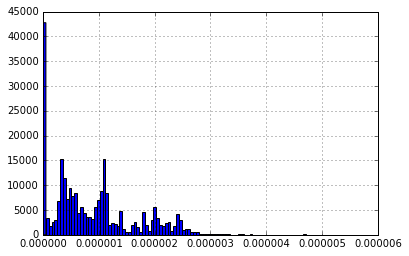

In [73]:
b=dfu.maxpss/1024/1024
b.hist(bins=100)

In [23]:
dfu.memory_usage()

Index                     80
batchid               367016
computingelement      367016
computingsite         367016
corecount             367016
cpuconsumptiontime    367016
creationtime          367016
endtime               367016
jobstatus             367016
maxpss                367016
maxrss                367016
modificationhost      367016
pandaid               367016
starttime             367016
wall_time             367016
dtype: int64

In [62]:
dfu.maxpss=dfu.maxpss/1024

In [72]:
#ppp=dfu.groupby(['computingsite']).maxpss
x=ppp.maxpss.plot.hist()

AttributeError: 'SeriesGroupBy' object has no attribute 'maxpss'

In [20]:
#dfu.to_csv('./ev_example_mem_all.csv')